### Bitcoin historic data (extraction)
**Working on it...**

Good [website](http://www.cryptodatadownload.com/) to start with.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import *
import matplotlib.pyplot as plt

# Package installation for financial visulizations
#!pip install --upgrade mplfinance
import mplfinance as mpf
import plotly.graph_objs as go

plt.style.use('seaborn')
%matplotlib inline

#### Prepare the Bitcoin datasets

In [3]:
btc_path_min = 'C:/Users/Javi/Desktop/cryptocurrency_predictor/data/crypto/BTCUSDT_1m_data.csv'
btc_path_hour = 'C:/Users/Javi/Desktop/cryptocurrency_predictor/data/crypto/BTCUSDT_1h_data.csv'
columns_to_use = ['timestamp', 'open', 'high', 'low', 'close', 'volume']
# Minutely BTC
btc_min = pd.read_csv(btc_path_min, usecols=columns_to_use)
df_btc_m = btc_min.copy()
# Hourly BTC
btc_hour = pd.read_csv(btc_path_hour, usecols=columns_to_use)
df_btc_h = btc_hour.copy()

df_btc_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98461 entries, 0 to 98460
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  98461 non-null  object 
 1   open       98461 non-null  float64
 2   high       98461 non-null  float64
 3   low        98461 non-null  float64
 4   close      98461 non-null  float64
 5   volume     98461 non-null  float64
dtypes: float64(5), object(1)
memory usage: 4.5+ MB


In [4]:
# Convert to datetime and Set date as index
# Minutely
df_btc_m['timestamp'] = pd.to_datetime(df_btc_m['timestamp'])
df_btc_m = df_btc_m.rename(columns = {'timestamp': 'date'}).set_index('date')
# Hourly
df_btc_h['timestamp'] = pd.to_datetime(df_btc_h['timestamp'])
df_btc_h = df_btc_h.rename(columns = {'timestamp': 'date'}).set_index('date')

df_btc_m.head(3)

,open,high,low,close,volume
date,,,,,
2021-01-01 00:00:00,28923.63,28961.66,28913.12,28961.66,27.457032
2021-01-01 00:01:00,28961.67,29017.50,28961.01,29009.91,58.477501
2021-01-01 00:02:00,29009.54,29016.71,28973.58,28989.30,42.470329


Now, we have a lot of data here that it will be helpful in the future. But now we just want to build a preliminary project with toy data, so let's take a look at the longest volume traded in the time of study.. **Same dates as twitter extraction sample we got earlier.** <br> Let's do it baby!

In [5]:
max_volume = (df_btc_m['volume'] == df_btc_m['volume'].max())
# Date with the greatest volume of bitcoins traded
df_btc_m[max_volume]

,open,high,low,close,volume
date,,,,,
2021-02-22 02:04:00,56705.76,56730.01,55351.15,56354.97,1866.93905


In [6]:
# Preparing the df to plot it 

intraday = df_btc_m[(df_btc_m.index > '2021-02-21 15:00:00') & (df_btc_m.index < '2021-02-22 09:00:00')]
# intraday.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
# intraday.set_index('Date', inplace=True)
print(intraday.shape)
intraday.head()

(1079, 5)


,open,high,low,close,volume
date,,,,,
2021-02-21 15:01:00,57484.30,57555.00,57484.30,57500.02,50.714899
2021-02-21 15:02:00,57504.83,57524.75,57395.08,57411.54,45.697068
2021-02-21 15:03:00,57411.54,57411.54,57288.00,57320.00,45.517284
2021-02-21 15:04:00,57320.00,57364.78,57296.31,57336.65,29.003769
2021-02-21 15:05:00,57336.65,57361.38,57250.00,57284.22,42.343511


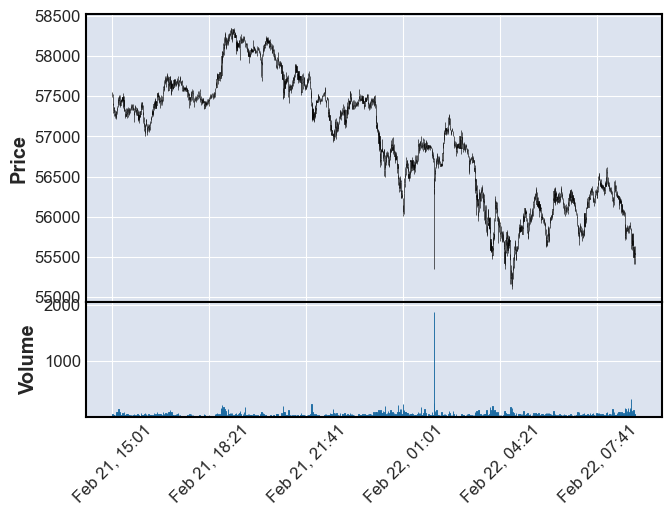

In [7]:
mpf.plot(intraday, type='candle', volume=True)

Actually plot this with plotly. Study how to implement it.

In [7]:
# fig = go.Candlestick(x=intraday.index,
#                open=intraday['open'],
#                high=intraday['high'],
#                low=intraday['low'],
#                close=intraday['close']);
# fig.ishow()

In [8]:
# # Volume of bitcoins traded in US dollars
# plt.figure(figsize=(10, 6))
# plt.plot(df_btc['date'], df_btc['volume_usd'])

# plt.title('Volume of bitcoins traded in USD')
# plt.xlabel('date (month-day hour)')
# plt.ylabel('million USD')

# Twitter sentiments

### Groupbies and sum by time frames

In [8]:
tweets_path = 'C:/Users/Javi/Desktop/cryptocurrency_predictor/data/twitter/scored_tweets.csv'

tweets = pd.read_csv(tweets_path)
df_tweets = tweets.copy()
df_tweets['date'] = pd.to_datetime(df_tweets['date'])
df_tweets = df_tweets[df_tweets['date'] >= '2021-02-21 00:00:00']
df_tweets.set_index('date', inplace=True)
print(df_tweets.info())
df_tweets.head(3)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 930842 entries, 2021-02-21 00:00:00 to 2021-03-10 10:18:19
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 930842 non-null  int64  
 1   text               930842 non-null  object 
 2   followers          930842 non-null  int64  
 3   likes              930842 non-null  int64  
 4   vader_polarity     930842 non-null  float64
 5   textblob_polarity  930842 non-null  float64
 6   emotion            930842 non-null  object 
 7   vader_score        930842 non-null  float64
 8   textblob_score     930842 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 71.0+ MB
None


,id,text,followers,likes,vader_polarity,textblob_polarity,emotion,vader_score,textblob_score
date,,,,,,,,,
2021-02-21,1363277252306358275,RT : Join the Airdrop to get a share of 5 mill...,49,0,0.5267,0.000,Positive,0.258083,0.00000
2021-02-21,1363277252557955072,RT : Because not everyone knows: If Bitcoin’s ...,127,0,0.0516,0.250,Positive,0.065532,0.31750
2021-02-21,1363277252633354242,RT : In 24 hours I’m going to give one random ...,11,0,0.0000,-0.625,Neutral,0.000000,-0.06875


In [9]:
one_min_vader_scores = df_tweets.groupby(pd.Grouper(freq='min'))[['vader_polarity', 'vader_score']].sum()
one_h_vader_scores = df_tweets.groupby(pd.Grouper(freq='h'))[['vader_score']].sum()

one_min_textblob_scores = df_tweets.groupby(pd.Grouper(freq='min'))[['textblob_polarity', 'textblob_score']].sum()
one_h_textblob_scores = df_tweets.groupby(pd.Grouper(freq='min'))[['textblob_score']].sum()

print(one_min_vader_scores.sample(3))
print('*' * 50)
print(one_min_textblob_scores.sample(3))

                     vader_polarity  vader_score
date                                            
2021-02-27 22:18:00             0.0          0.0
2021-03-06 19:24:00             0.0          0.0
2021-03-01 12:17:00             0.0          0.0
**************************************************
                     textblob_polarity  textblob_score
date                                                  
2021-03-02 12:44:00           0.000000        0.000000
2021-02-26 02:31:00           0.000000        0.000000
2021-03-07 10:17:00          14.335495      128.030285


Text(0, 0.5, 'Total Score')

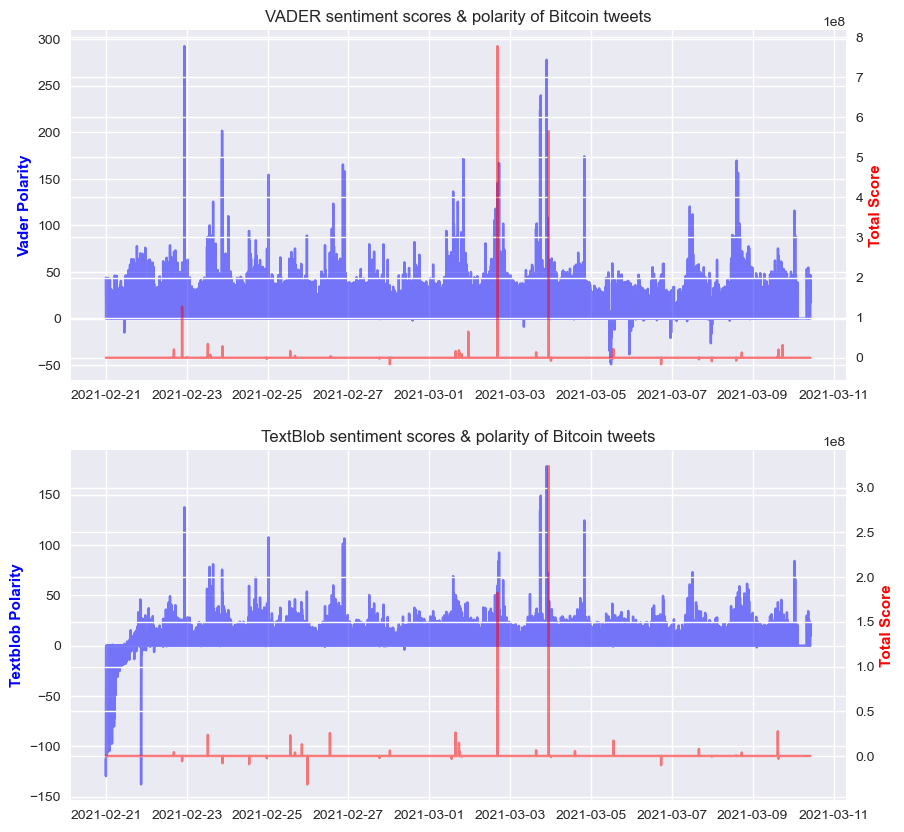

In [10]:
plt.style.use('seaborn')

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
# VADER plot
axes[0].set_title('VADER sentiment scores & polarity of Bitcoin tweets')
ax1 = axes[0].twinx()
axes[0].plot(one_min_vader_scores.index, one_min_vader_scores['vader_polarity'], 'b', alpha=0.5)
ax1.plot(one_min_vader_scores.index, one_min_vader_scores['vader_score'], 'r', alpha=0.5)
axes[0].set_ylabel('Vader Polarity', color='b')
ax1.set_ylabel('Total Score', color='r')

# TextBlob plot
axes[1].set_title('TextBlob sentiment scores & polarity of Bitcoin tweets')
ax2 = axes[1].twinx()
axes[1].plot(one_min_vader_scores.index, one_min_textblob_scores['textblob_polarity'], 'b', alpha=0.5)
ax2.plot(one_min_vader_scores.index, one_min_textblob_scores['textblob_score'], 'r', alpha=0.5)
axes[1].set_ylabel('Textblob Polarity', color='b')
ax2.set_ylabel('Total Score', color='r')

It looks like there is, at least, one outstanding positive outlier in VADER score.

## VADER Analysis

### Minutely

#### Data merging

In [11]:
# Reduce bitcoin df length to match 
df_btc_m = df_btc_m[(df_btc_m.index >= df_tweets.index.min()) & (df_btc_m.index <= df_tweets.index.max())]

In [12]:
data_m = pd.merge(df_btc_m, one_min_vader_scores, right_index=True, left_index=True)
data_m.head(3)

,open,high,low,close,volume,vader_polarity,vader_score
date,,,,,,,
2021-02-21 00:00:00,55841.19,55987.97,55822.33,55885.13,134.205366,43.8765,5393.834267
2021-02-21 00:01:00,55882.34,55899.83,55622.30,55748.36,117.877839,27.2732,-415.733769
2021-02-21 00:02:00,55754.73,55850.00,55731.33,55745.63,87.712717,43.4384,148.053613


In [13]:
data_m['vader_score'].min(), data_m['vader_score'].max()

(-16424390.526528005, 777131844.7652763)

In [31]:
# Remove the outlier
data_m['vader_no_outliers'] = data_m['vader_no_outliers'].replace([data_m['vader_no_outliers'].max()], data_m['vader_score'].mean())

#### Plot

Text(0, 0.5, 'VADER Sentiment Score')

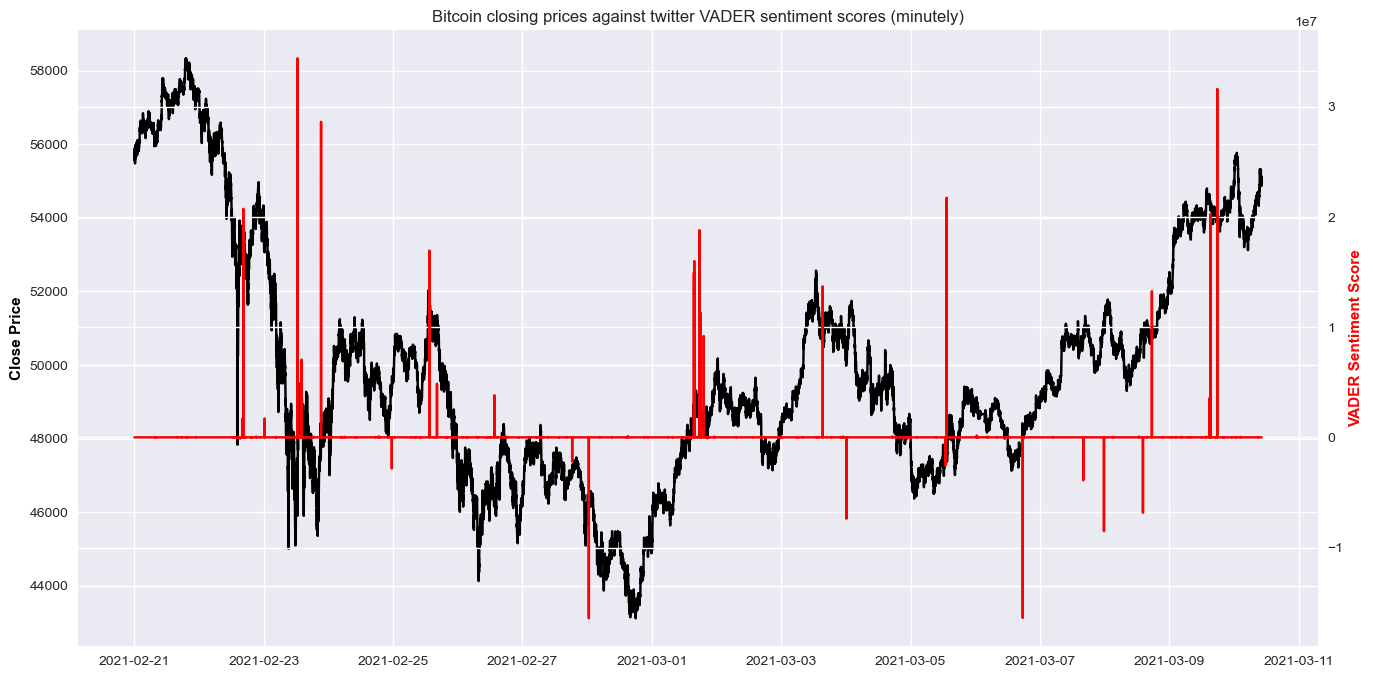

In [32]:
fig, ax1 = plt.subplots(figsize=(16, 8))

ax1.set_title('Bitcoin closing prices against twitter VADER sentiment scores (minutely)')
ax2 = ax1.twinx()

ax1.plot(data_m.index, data_m['close'], 'k')
ax2.plot(data_m.index, data_m['vader_no_outliers'], 'r')

ax1.set_ylabel('Close Price', color='k')
ax2.set_ylabel('VADER Sentiment Score', color='r')

#### Correlation coefficients

We are going to calculate correlation coefficients between Bitcoin close prices and VADER sentiment scores. We need to check if there is any lag between people posting tweets and the actual price changing.

In [16]:
# Defining some functions
def corr_coef(x, y, method, lag=0):
    """It returns a correlation coeficient.
    
    Parameters
    -----------
    x : pandas.Series
    y : pandas.Series
    method : 'pearson' , 'spearman', 'kendall'
    lag : number of desire lags"""
    
    return x.corr(y.shift(lag), method)


def plot_coef(coefs, range_, name):
    """Plots linear chart given a corr coefficient and a specific range.
    
    Parameters
    ----------
    coefs : list of coefficients
    range_ : range
    name : str. Coefficient name"""
    plt.figure(figsize=(6, 4))
    plt.plot(coefs, range_)
    plt.title(f'{name} Correlation Coefficient')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')

In [33]:
# Defining some variables
x = data_m['vader_no_outliers']
y = data_m['close']
minutely_range = range(-60*5, 60*5)

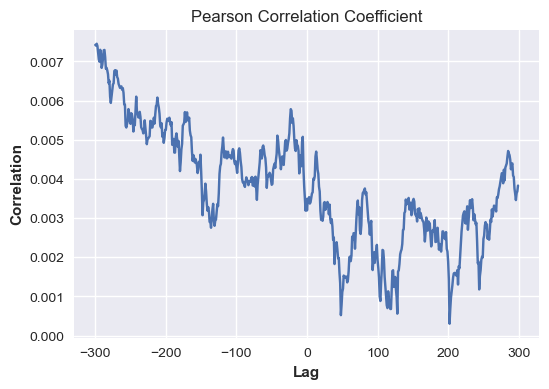

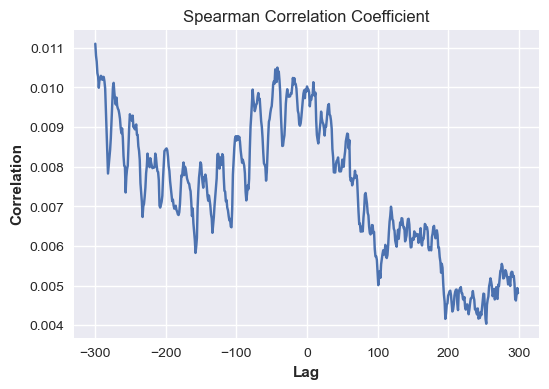

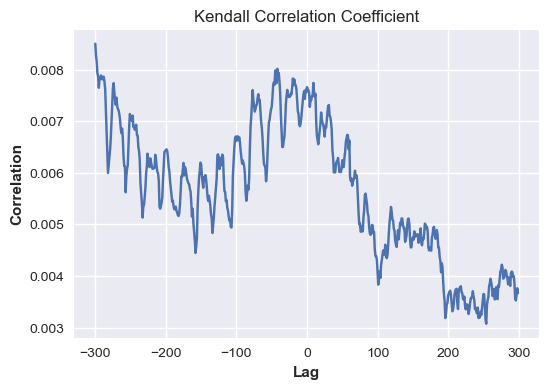

In [34]:
coef = [corr_coef(x, y, 'pearson', lag=lag) for lag in minutely_range]
plot_coef(minutely_range, coef, 'Pearson')

coef = [corr_coef(x, y, 'spearman', lag=lag) for lag in minutely_range]
plot_coef(minutely_range, coef, 'Spearman')

coef = [corr_coef(x, y, 'kendall', lag=lag) for lag in minutely_range]
plot_coef(minutely_range, coef, 'Kendall')

### Hourly

In [35]:
# Reduce bitcoin df length to match 
df_btc_h = df_btc_h[(df_btc_h.index >= df_tweets.index.min()) & (df_btc_h.index <= df_tweets.index.max())]

data_h = pd.merge(df_btc_h, one_h_vader_scores, right_index=True, left_index=True)
data_h.head()

,open,high,low,close,volume,vader_score
date,,,,,,
2021-02-21 00:00:00,55841.19,56061.64,55477.59,55834.95,2949.777561,14823.747107
2021-02-21 01:00:00,55834.95,56351.08,55717.87,56347.69,2125.263288,10205.714816
2021-02-21 02:00:00,56347.70,56660.94,56253.77,56318.08,2201.031649,18194.482217
2021-02-21 03:00:00,56318.08,56900.00,56311.40,56505.22,2027.220197,6304.401240
2021-02-21 04:00:00,56505.22,56725.12,56040.31,56701.08,2060.642337,11775.762624


In [55]:
data_h['vader_no_outliers'] = data_h['vader_no_outliers'].replace([data_h['vader_no_outliers'].max()], data_h['vader_score'].mean())

In [56]:
data_h['vader_score'].max(), data_h['vader_no_outliers'].max()

(777151181.1270144, 34427828.02294693)

#### Plot

Text(0, 0.5, 'VADER Sentiment Score')

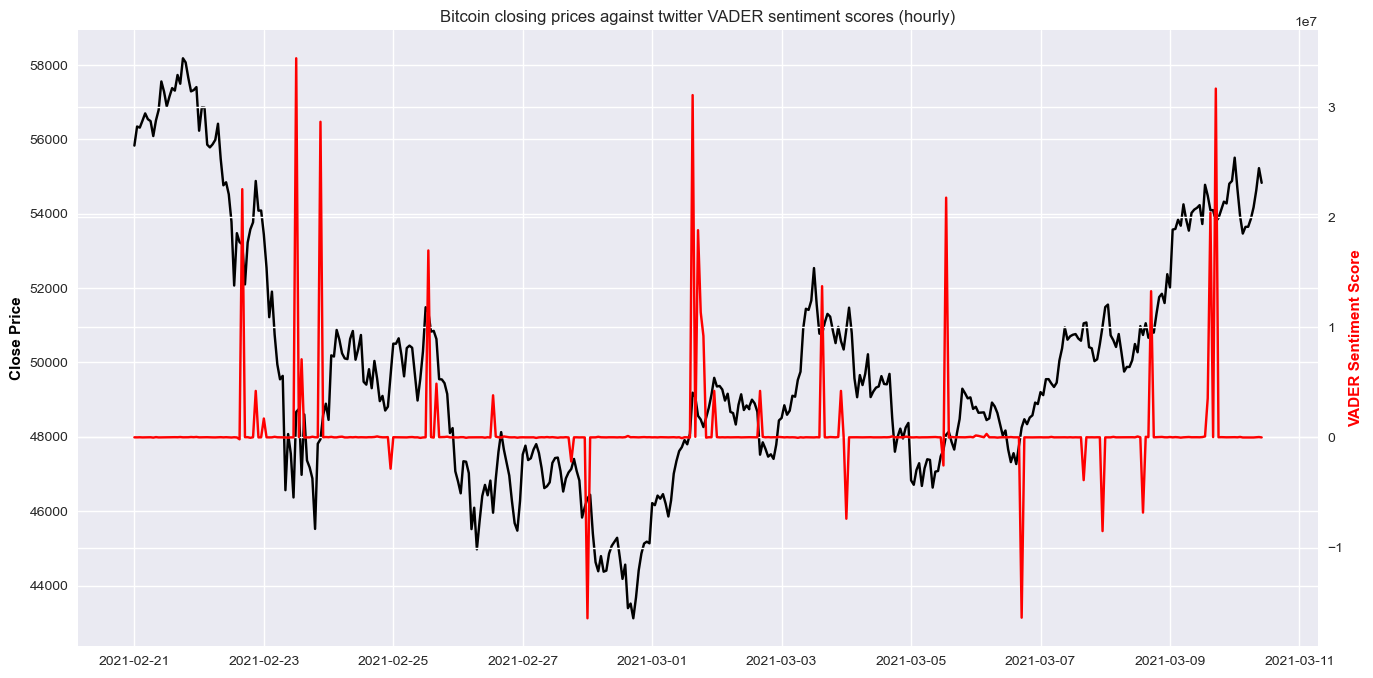

In [57]:
fig, ax1 = plt.subplots(figsize=(16, 8))

ax1.set_title('Bitcoin closing prices against twitter VADER sentiment scores (hourly)')
ax2 = ax1.twinx()

ax1.plot(data_h.index, data_h['close'], 'k')
ax2.plot(data_h.index, data_h['vader_no_outliers'], 'r')

ax1.set_ylabel('Close Price', color='k')
ax2.set_ylabel('VADER Sentiment Score', color='r')

#### Correlation Coefficients

In [58]:
# Defining some variables
x = data_h['vader_no_outliers']
y = data_h['close']
hourly_range = range(-30, 30)

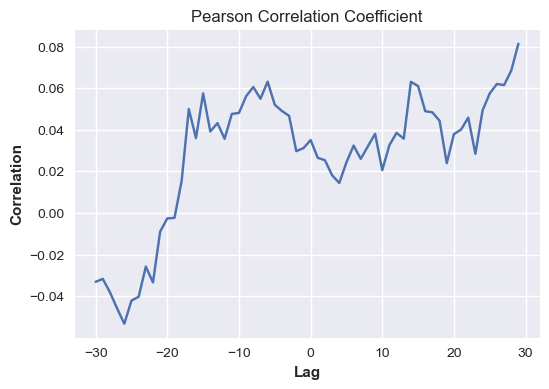

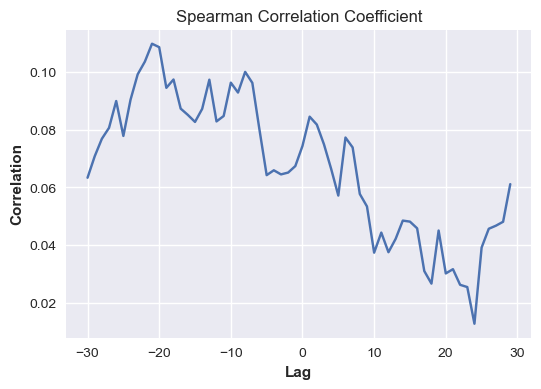

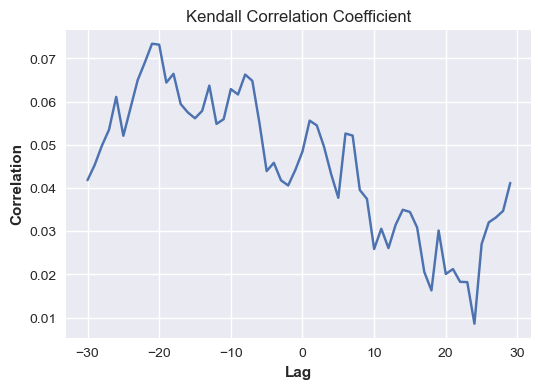

In [59]:
coef = [corr_coef(x, y, 'pearson', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Pearson')

coef = [corr_coef(x, y, 'spearman', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Spearman')

coef = [corr_coef(x, y, 'kendall', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Kendall')

It seems that the variables are (slightly) more correlated when data is hourly aggregated.

### Standardized hourly data for VADER sentiments

In [63]:
df = data_h.drop(['open', 'high', 'low', 'vader_score'], axis=1)
df.head(3)

,close,volume,vader_no_outliers
date,,,
2021-02-21 00:00:00,55834.95,2949.777561,14823.747107
2021-02-21 01:00:00,56347.69,2125.263288,10205.714816
2021-02-21 02:00:00,56318.08,2201.031649,18194.482217


In [70]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns, index=df.index)
scaled_df

,close,volume,vader_no_outliers
date,,,
2021-02-21 00:00:00,1.874956,-0.246576,-0.140520
2021-02-21 01:00:00,2.035893,-0.622604,-0.141622
2021-02-21 02:00:00,2.026599,-0.588049,-0.139716
2021-02-21 03:00:00,2.085338,-0.667318,-0.142552
2021-02-21 04:00:00,2.146814,-0.652075,-0.141247
...,...,...,...
2021-03-10 06:00:00,1.256451,-0.433925,-0.144056
2021-03-10 07:00:00,1.353429,-0.218707,-0.144056
2021-03-10 08:00:00,1.497627,-0.576840,-0.140228


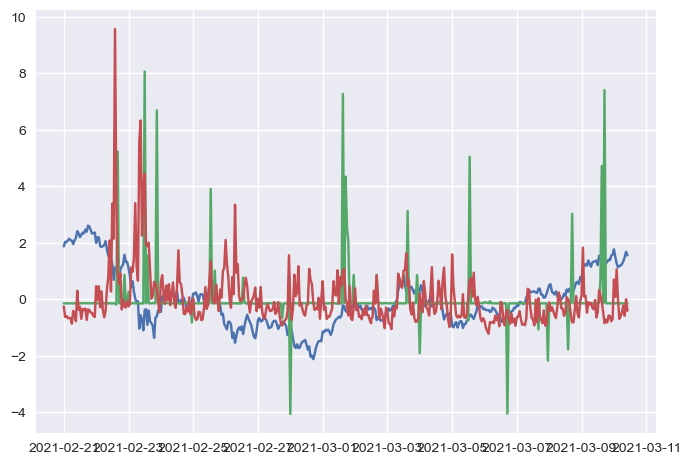

In [73]:
plt.plot(scaled_df['close'])

plt.plot(scaled_df['vader_no_outliers'])

plt.plot(scaled_df['volume'])

#### Correlations

In [74]:
# Defining some variables
x_close = scaled_df['close']
y_vader = scaled_df['vader_no_outliers']
z_volume = scaled_df['volume']
hourly_range = range(-30, 30)

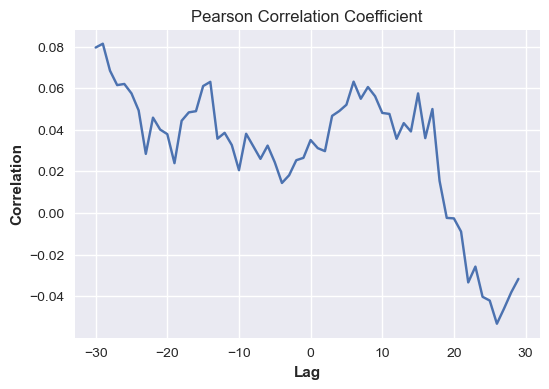

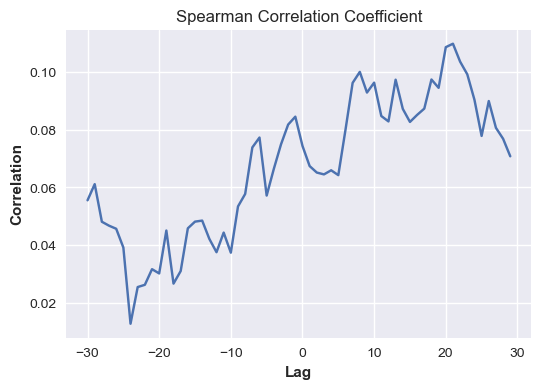

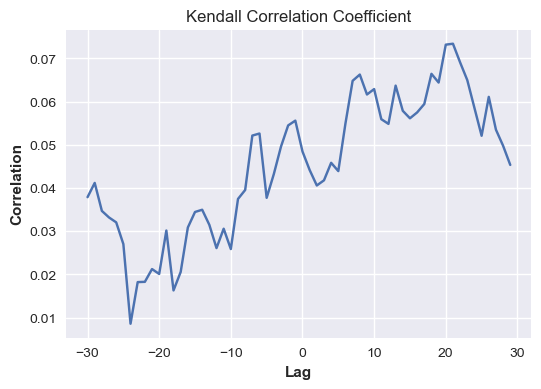

In [75]:
# Standarized close and VADER score with no outliers
coef = [corr_coef(x_close, y_vader, 'pearson', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Pearson')

coef = [corr_coef(x_close, y_vader, 'spearman', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Spearman')

coef = [corr_coef(x_close, y_vader, 'kendall', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Kendall')

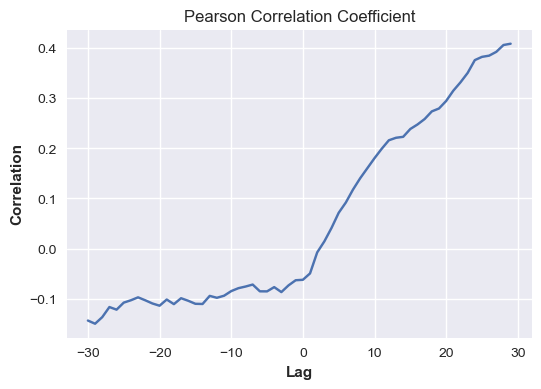

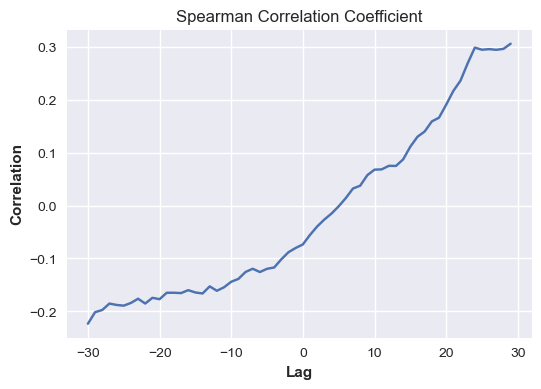

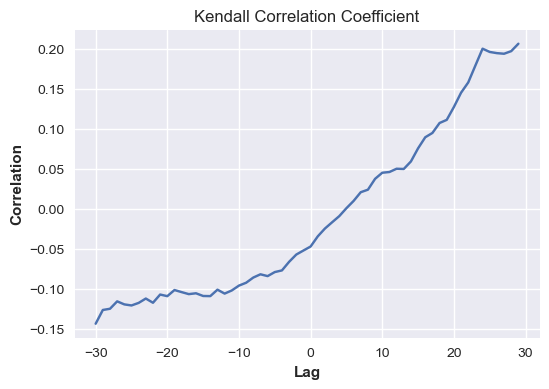

In [77]:
# Standardized Close and Volume
coef = [corr_coef(z_volume, x_close, 'pearson', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Pearson')

coef = [corr_coef(z_volume, x_close, 'spearman', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Spearman')

coef = [corr_coef(z_volume, x_close, 'kendall', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Kendall')

### Google Trends

In [126]:
btc_trends = pd.read_csv('C:/Users/Javi/Desktop/cryptocurrency_predictor/data/google_trends/bitcoin_trends.csv')
btc_trends.set_index('date', drop=True, inplace=True)
btc_trends.index = pd.to_datetime(btc_trends.index)

In [127]:
btc_h = btc_hour.copy()
btc_h.drop(['open', 'high', 'low'], axis=1, inplace=True)
btc_h.set_index('timestamp', drop=True, inplace=True)
btc_h.index = pd.to_datetime(btc_h.index)

In [128]:
btc_h = btc_h[(btc_h.index >= btc_trends.index.min()) & (btc_h.index <= btc_trends.index.max())]

In [129]:
len(btc_h), len(btc_trends)

(1416, 1425)

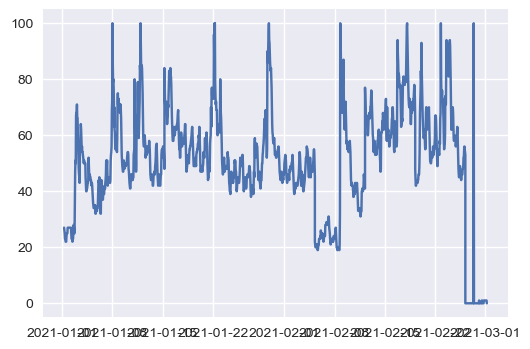

In [130]:
plt.figure(figsize=(6, 4))
plt.plot(btc_trends['bitcoin'])

There are some outliers in Google Trends Bitcoin equal to 0 that deform our variable meaning. Let's remove them

In [131]:
btc_trends['bitcoin'] = btc_trends['bitcoin'].replace(0, btc_trends['bitcoin'].median())
btc_trends['bitcoin'] = btc_trends['bitcoin'].replace(1, btc_trends['bitcoin'].median() + 1)

#### Plot it

Text(0, 0.5, 'Bitcoin closing prices')

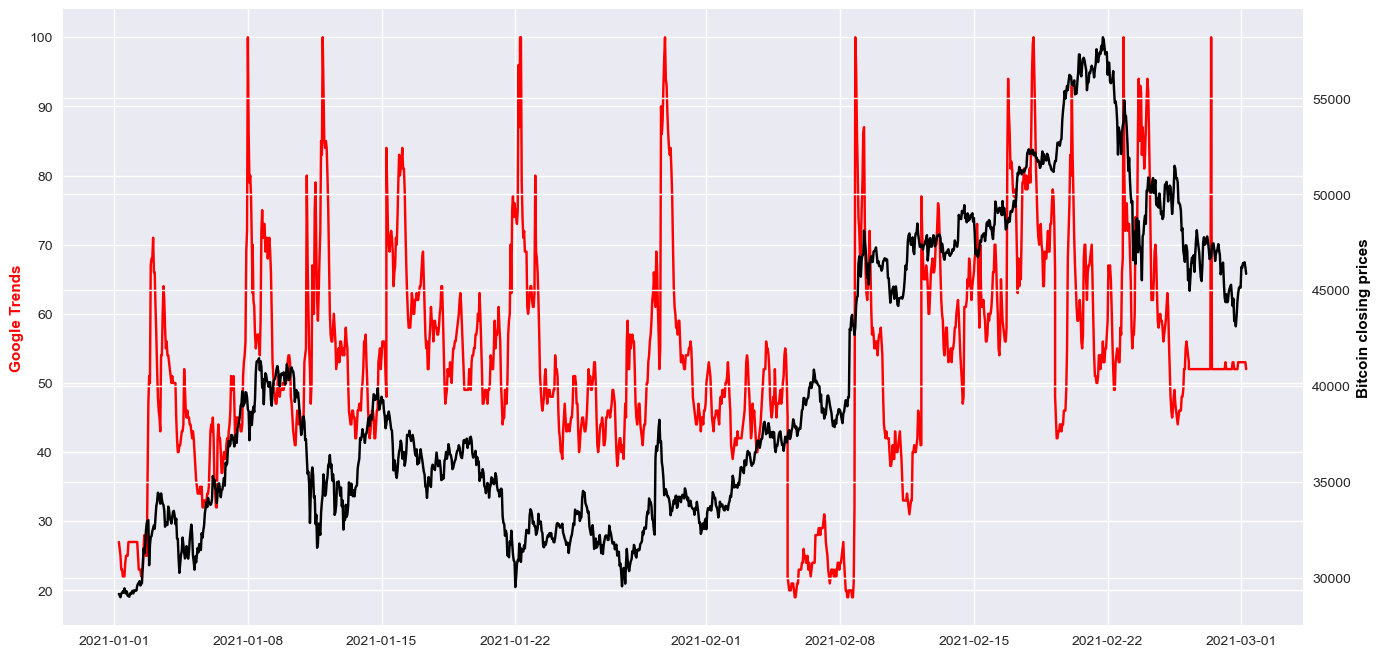

In [132]:
fig, ax1 = plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()

ax1.plot(btc_trends.index, btc_trends['bitcoin'], 'r')
ax2.plot(btc_h.index, btc_h['close'], 'k')

ax1.set_ylabel('Google Trends', color='r')
ax2.set_ylabel('Bitcoin closing prices', color='k')

#### Correlations

In [133]:
# Defining some variables
x = btc_h['close']
y = btc_trends['bitcoin']
hourly_range = range(-30, 30)

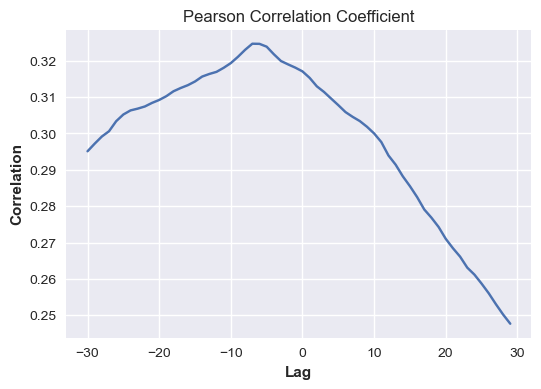

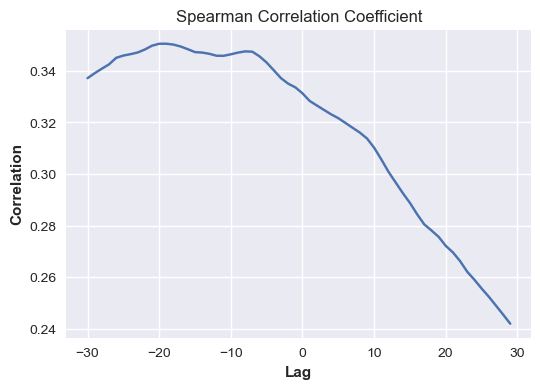

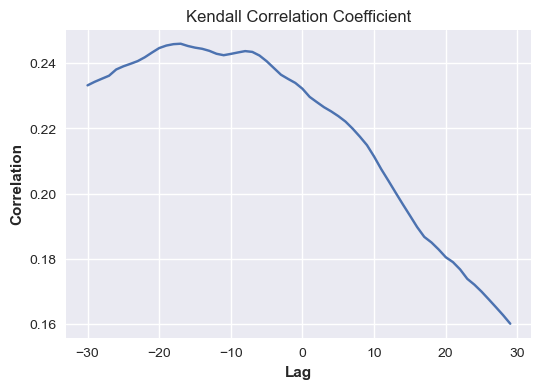

In [134]:
coef = [corr_coef(x, y, 'pearson', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Pearson')

coef = [corr_coef(x, y, 'spearman', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Spearman')

coef = [corr_coef(x, y, 'kendall', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Kendall')

## TextBlob Analysis

### Minutely

Text(0, 0.5, 'TextBlob Sentiment score')

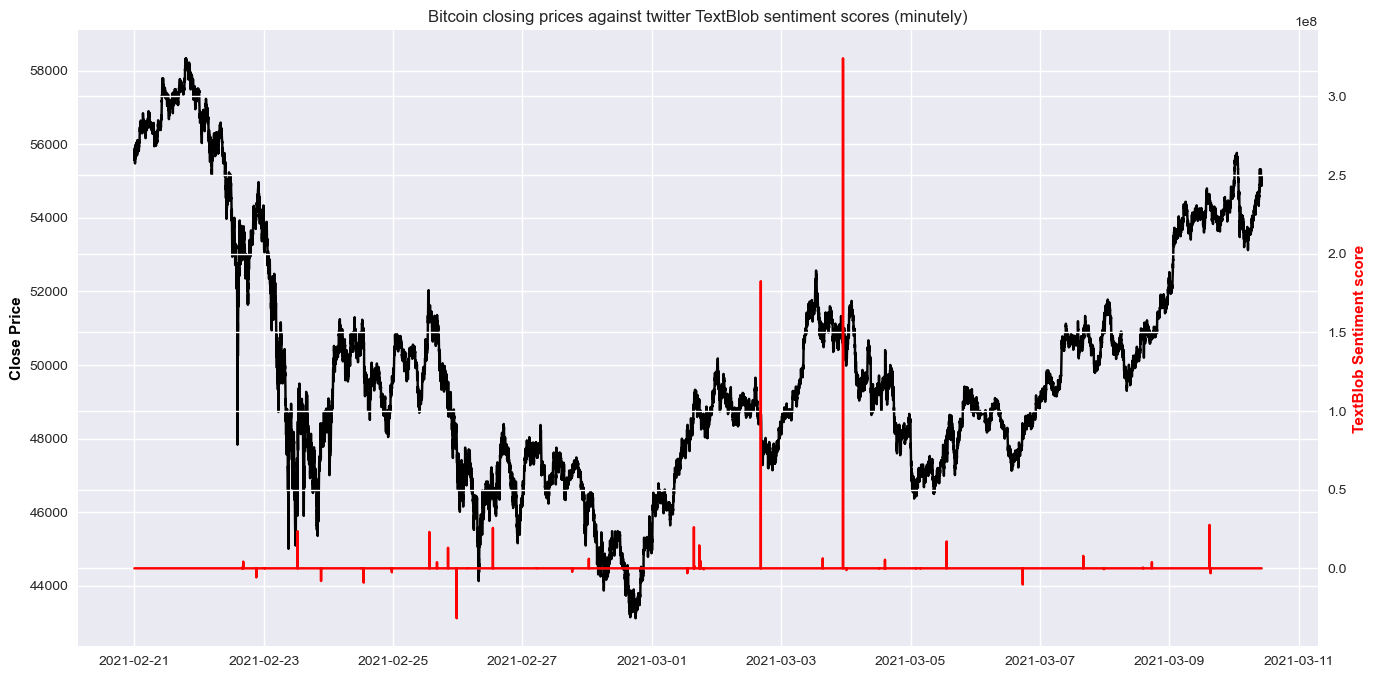

In [45]:
# Creating a df for textblob
data_tb_m = pd.merge(df_btc_m, one_min_textblob_scores, right_index=True, left_index=True)
# Plot
fig, ax1 = plt.subplots(figsize=(16, 8))

ax1.set_title('Bitcoin closing prices against twitter TextBlob sentiment scores (minutely)')
ax2 = ax1.twinx()

ax1.plot(data_tb_m.index, data_tb_m['close'], 'k')
ax2.plot(data_tb_m.index, data_tb_m['textblob_score'], 'r')

ax1.set_ylabel('Close Price', color='k')
ax2.set_ylabel('TextBlob Sentiment score', color='r')

VADER sentiment scores seem to be more correlated to Bitcoin prices than TextBlob scores, as we thought even before plotting.

#### Correlation coefficients

In [46]:
# Defining some variables
x = data_tb_m['textblob_score']
y = data_tb_m['close']
minutely_range = range(-60*5, 60*5)

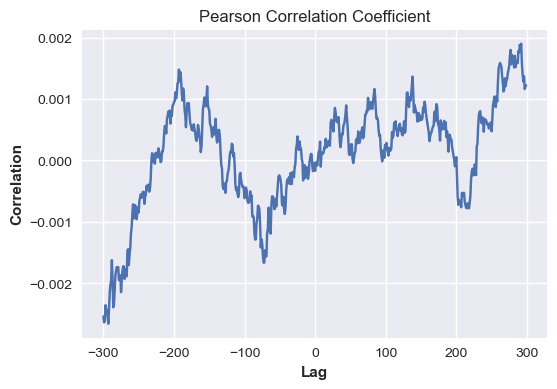

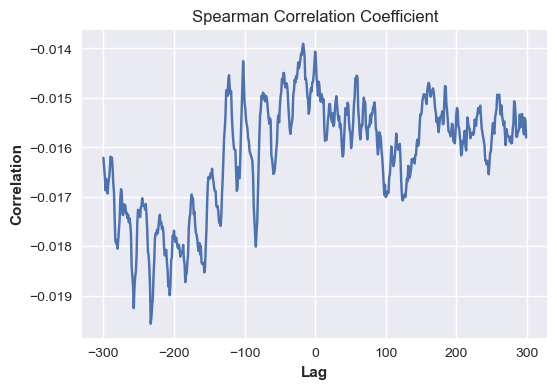

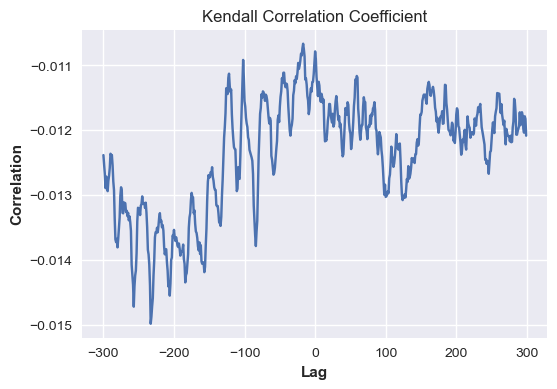

In [47]:
coef = [corr_coef(x, y, 'pearson', lag=lag) for lag in minutely_range]
plot_coef(minutely_range, coef, 'Pearson')

coef = [corr_coef(x, y, 'spearman', lag=lag) for lag in minutely_range]
plot_coef(minutely_range, coef, 'Spearman')

coef = [corr_coef(x, y, 'kendall', lag=lag) for lag in minutely_range]
plot_coef(minutely_range, coef, 'Kendall')

### Cross Corr TB hourly

In [48]:
# Creating a df for textblob
data_tb_h = pd.merge(df_btc_h, one_h_textblob_scores, right_index=True, left_index=True)
# Defining some variables
x = data_tb_h['textblob_score']
y = data_tb_h['close']
hourly_range = range(-30, 30)

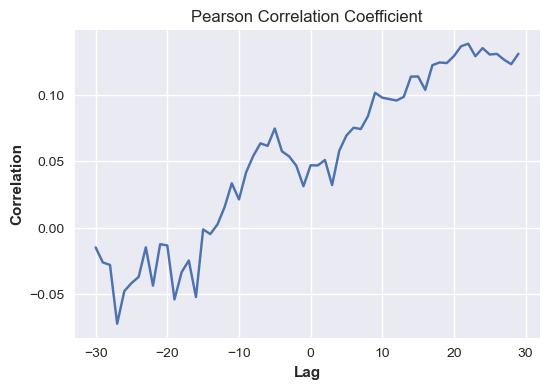

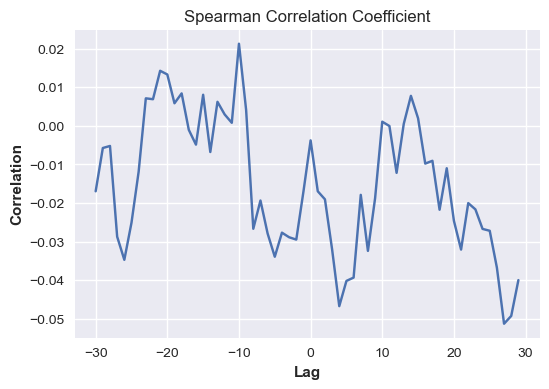

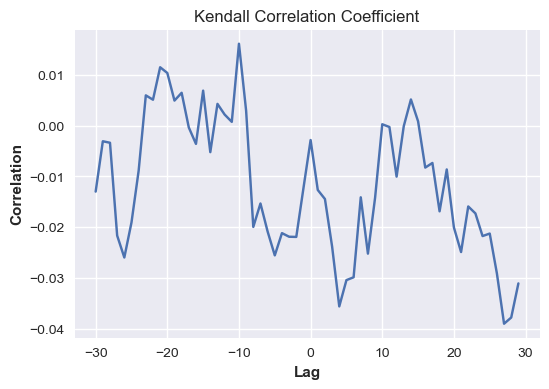

In [49]:
coef = [corr_coef(x, y, 'pearson', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Pearson')

coef = [corr_coef(x, y, 'spearman', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Spearman')

coef = [corr_coef(x, y, 'kendall', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Kendall')